# Assignment - 2

### Library

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
path = 'D:\Term 2\Machine Learning\Data Set'
os.chdir(path)

### Importing the 'HR Analytics.csv' file to 'data' dataframe

In [3]:
data = pd.read_csv('HR Analytics.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Cleaning and Pre-Processing the 'data' Dataframe

In [4]:
# data cleaning and preprocessing

le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

#data.to_csv('HR_Analytics_Encoded.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


### Normalization Data

In [5]:
data1 = data.copy()
scaler = MinMaxScaler()
ls = list()
for column in data.columns:
    x = data[[column]].values.astype(float)
    x_scaler = scaler.fit_transform(x)
    name = column+'1'
    data1[name] = x_scaler

In [6]:
ls = ['Age1','BusinessTravel1','DailyRate1','Department1','DistanceFromHome1','Education1','EducationField1',
      'EmployeeCount1','EmployeeNumber1','EnvironmentSatisfaction1','Gender1','HourlyRate1','JobInvolvement1','JobLevel1',
      'JobRole1','JobSatisfaction1','MaritalStatus1','MonthlyIncome1','MonthlyRate1','NumCompaniesWorked1','Over181',
      'OverTime1','PercentSalaryHike1','PerformanceRating1','RelationshipSatisfaction1','StandardHours1',
      'StockOptionLevel1','TotalWorkingYears1', 'TrainingTimesLastYear1','WorkLifeBalance1','YearsAtCompany1',
      'YearsInCurrentRole1','YearsSinceLastPromotion1','YearsWithCurrManager1','Attrition1']

data_scaled = data1[ls]
data_scaled.head()

,Age1,BusinessTravel1,DailyRate1,Department1,DistanceFromHome1,Education1,EducationField1,EmployeeCount1,EmployeeNumber1,EnvironmentSatisfaction1,...,StandardHours1,StockOptionLevel1,TotalWorkingYears1,TrainingTimesLastYear1,WorkLifeBalance1,YearsAtCompany1,YearsInCurrentRole1,YearsSinceLastPromotion1,YearsWithCurrManager1,Attrition1
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,0.333333,...,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1.0
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,0.666667,...,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,1.000000,...,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,0.000000,...,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0


-------------------------------------------------------

# KNN - Algorithm

In [7]:
from sklearn.neighbors import KNeighborsClassifier

### Separtating the data into target variable and predictor's variable

In [8]:
X = data_scaled.loc[:,['Age1','BusinessTravel1','DailyRate1','Department1','DistanceFromHome1','Education1',
                       'EducationField1','EmployeeCount1','EmployeeNumber1','EnvironmentSatisfaction1','Gender1',
                       'HourlyRate1','JobInvolvement1','JobLevel1','JobRole1','JobSatisfaction1','MaritalStatus1',
                       'MonthlyIncome1','MonthlyRate1','NumCompaniesWorked1','Over181','OverTime1','PercentSalaryHike1',
                       'PerformanceRating1','RelationshipSatisfaction1','StandardHours1','StockOptionLevel1',
                       'TotalWorkingYears1', 'TrainingTimesLastYear1','WorkLifeBalance1','YearsAtCompany1',
                       'YearsInCurrentRole1','YearsSinceLastPromotion1','YearsWithCurrManager1']]
Y = data_scaled.loc[:,'Attrition1']

### Spliting the Data into trainning and testing dataset

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1176, 34)

### To find the optimal K value using plotting the graph

In [10]:
## Finding the k value by ploting the graph

k = list(range(1,len(x_test),2))
mis_list = []
dist = {}

for i in k:
    vary_knn = KNeighborsClassifier(n_neighbors=i)
    vary_knn.fit(x_train,y_train)
    
    misclassifer = int(len(x_test) - (vary_knn.score(x_test,y_test)* len(x_test)))
    
    mis_list.append(misclassifer)
    dist[i] = misclassifer

In [11]:
print(dist)

{1: 56, 3: 54, 5: 49, 7: 46, 9: 41, 11: 43, 13: 44, 15: 46, 17: 46, 19: 47, 21: 47, 23: 48, 25: 49, 27: 48, 29: 49, 31: 49, 33: 48, 35: 48, 37: 48, 39: 49, 41: 49, 43: 49, 45: 49, 47: 49, 49: 49, 51: 49, 53: 49, 55: 49, 57: 49, 59: 49, 61: 49, 63: 49, 65: 49, 67: 49, 69: 49, 71: 49, 73: 49, 75: 49, 77: 49, 79: 49, 81: 49, 83: 49, 85: 49, 87: 49, 89: 49, 91: 49, 93: 49, 95: 49, 97: 49, 99: 49, 101: 49, 103: 49, 105: 49, 107: 49, 109: 49, 111: 49, 113: 49, 115: 49, 117: 49, 119: 49, 121: 49, 123: 49, 125: 49, 127: 49, 129: 49, 131: 49, 133: 49, 135: 49, 137: 49, 139: 49, 141: 49, 143: 49, 145: 49, 147: 49, 149: 49, 151: 49, 153: 49, 155: 49, 157: 49, 159: 49, 161: 49, 163: 49, 165: 49, 167: 49, 169: 49, 171: 49, 173: 49, 175: 49, 177: 49, 179: 49, 181: 49, 183: 49, 185: 49, 187: 49, 189: 49, 191: 49, 193: 49, 195: 49, 197: 49, 199: 49, 201: 49, 203: 49, 205: 49, 207: 49, 209: 49, 211: 49, 213: 49, 215: 49, 217: 49, 219: 49, 221: 49, 223: 49, 225: 49, 227: 49, 229: 49, 231: 49, 233: 49, 2

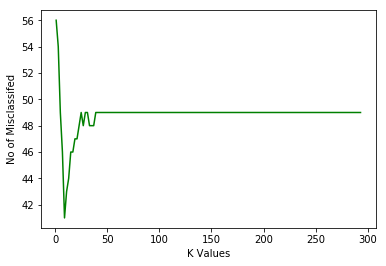

In [12]:
plt.plot(k, mis_list, color = 'green')
plt.xlabel("K Values")
plt.ylabel("No of Misclassifed")
plt.show()

By seeing the graph above and values in the dictionary dict, the value of misclassifer is less from k equals 9, so optimal k value is '9'. Here i am using 9 as k value to build the model.

### Build KNN model and Predicting the value to x_test

In [13]:
knn = KNeighborsClassifier(n_neighbors=9)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

### Finding the accuracy of the model

In [14]:
## Accuracy of model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 86.05442176870748


The accuracy of the model created is 86.05%. This means, we can predict 86.05% of information of target variable ('Attrition') accuraly from this model.

### Finding Area Under the Curve

In [15]:
# Returing probability estimates for the test vector

probs = knn.predict_proba(x_test)
#print(probs)

In [16]:
# Keep probability of the positive rate

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

## Area under the curve

print("Area under the curve : ", roc_auc)

Area under the curve :  0.7323615160349854


Here, Area under the curve is 73.23%. So, from this we can understand that 73% of data correctly predicted.

### Confussion Matrix

In [17]:
## Confussion Matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[245,   0],
       [ 41,   8]], dtype=int64)

From this confussion matrix, 245 are truely classified as positive, 41 are falsely classified as negative and 8 are truely classified as negative.
Out of 294 rows, 253 are correctly classified and 41 are wrongly classified

### ROC Graph

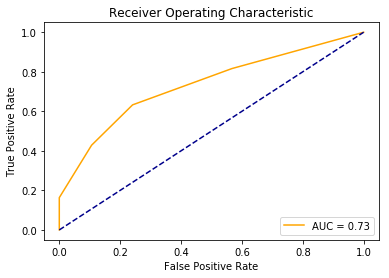

In [18]:
# Plot ROC curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

----------------

# Naive Bayes Algorithm

In [19]:
from time import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score

## Without Scaling

### Separtating the data into target variable and predictor's variable

In [20]:
X = data.loc[:,['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField',
                 'EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement',
                 'JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate',
                 'NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating',
                 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears', 
                 'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
                 'YearsSinceLastPromotion','YearsWithCurrManager']]
Y = data.loc[:,'Attrition']

### Spliting the Data into trainning and testing dataset

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1176, 34)

## Gaussian Naive Bayes

In [22]:
gnb = GaussianNB()

print("Start training...")
tStart = time()
gnb.fit(x_train, y_train)
print("Training time: ", round(time()-tStart, 3), "s")

# making predictions on the testing set 
y_pred = gnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.005 s
Accuracy:  79.93197278911565


The accuracy of the model created is 79.93%. This means, we can predict 79.93% of information of target variable ('Attrition') accuraly from this model.

In [23]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[205  40]
 [ 19  30]]


From this confussion matrix, 205 are truely classified as positive,40 are falsely classeified as positive, 19 are falsely classified as negative and 30 are truely classified as negative.
Out of 294 rows, 235 are correctly classified and 59 are wrongly classified

In [24]:
#Return probability estimates for the test vector 

probs = gnb.predict_proba(x_test)
#print(probs)

In [25]:
#Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7652644731361932


Here, Area under the curve is 76.52%. So, from this we can understand that 76% of data correctly predicted.

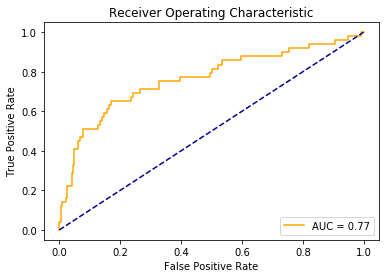

In [26]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Bernoulli Naive Bayes

In [27]:
bnb=BernoulliNB()

print("Start training...")
tStart = time()
bnb.fit(x_train, y_train)
print("Training time: ", round(time()-tStart, 3), "s")

# making predictions on the testing set 
y_pred = bnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.006 s
Accuracy:  81.97278911564626


The accuracy of the model created is 81.97%. This means, we can predict 81.97% of information of target variable ('Attrition') accuraly from this model.

In [28]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[230  15]
 [ 38  11]]


From this confussion matrix, 230 are truely classified as positive, 15 are falsely classified as positive, 38 are falsely classified as negative and 11 are truely classified as negative.
Out of 294 rows, 241 are correctly classified and 53 are wrongly classified

In [29]:
#Return probability estimates for the test vector 

probs = bnb.predict_proba(x_test)
#print(probs)

In [30]:
#Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7623490212411496


Here, Area under the curve is 76.23%. So, from this we can understand that 76% of data correctly predicted.

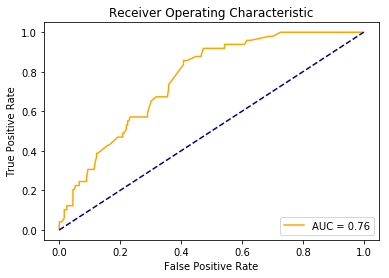

In [31]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Multinormial Naive Bayes

In [32]:
mnb=MultinomialNB()

print("Start training...")
tStart = time()
mnb.fit(x_train, y_train)
print("Training time: ", round(time()-tStart, 3), "s")

# making predictions on the testing set 
y_pred = mnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.004 s
Accuracy:  52.04081632653062


The accuracy of the model created is 52.04%. This means, we can predict 52.04% of information of target variable ('Attrition') accuraly from this model.

In [33]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[124 121]
 [ 20  29]]


From this confussion matrix, 124 are truely classified as positive, 121 are falsely classified as positive, 20 are falsely classified as negative and 29 are truely classified as negative.
Out of 294 rows, 153 are correctly classified and 141 are wrongly classified

In [34]:
#Return probability estimates for the test vector 

probs = mnb.predict_proba(x_test)
#print(probs)

In [35]:
#Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.5586838817159516


Here, Area under the curve is 55.86%. So, from this we can understand that 55% of data correctly predicted.

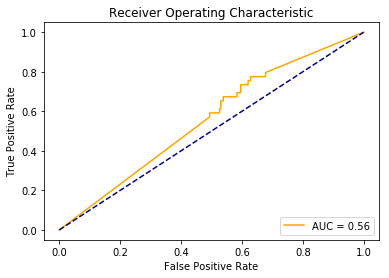

In [36]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ideal model for given data set is Gaussian Naive Bayes Algorithm model with accurary of 79.93% and area under the curve is 0.77.
From this we can predict 79.93% of information of target variable and 76.52% of data can be predicted correctly.

## With Scaling

### Separtating the data into target variable and predictor's variable

In [37]:
X = data_scaled.loc[:,['Age1','BusinessTravel1','DailyRate1','Department1','DistanceFromHome1','Education1',
                       'EducationField1','EmployeeCount1','EmployeeNumber1','EnvironmentSatisfaction1','Gender1',
                       'HourlyRate1','JobInvolvement1','JobLevel1','JobRole1','JobSatisfaction1','MaritalStatus1',
                       'MonthlyIncome1','MonthlyRate1','NumCompaniesWorked1','Over181','OverTime1','PercentSalaryHike1',
                       'PerformanceRating1','RelationshipSatisfaction1','StandardHours1','StockOptionLevel1',
                       'TotalWorkingYears1', 'TrainingTimesLastYear1','WorkLifeBalance1','YearsAtCompany1',
                       'YearsInCurrentRole1','YearsSinceLastPromotion1','YearsWithCurrManager1']]
Y = data_scaled.loc[:,'Attrition1']

### Spliting the Data into trainning and testing dataset

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1176, 34)

## Gaussian Naive Bayes

In [39]:
gnb = GaussianNB()

print("Start training...")
tStart = time()
gnb.fit(x_train, y_train)
print("Training time: ", round(time()-tStart, 3), "s")

# making predictions on the testing set 
y_pred = gnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.004 s
Accuracy:  79.93197278911565


The accuracy of the model created is 79.93%. This means, we can predict 79.93% of information of target variable ('Attrition') accuraly from this model.

In [40]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[203  42]
 [ 17  32]]


From this confussion matrix, 203 are truely classified as positive,42 are falsely classeified as positive, 17 are falsely classified as negative and 32 are truely classified as negative.
Out of 294 rows, 235 are correctly classified and 59 are wrongly classified

In [41]:
#Return probability estimates for the test vector 

probs = gnb.predict_proba(x_test)
#print(probs)

In [42]:
#Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.772594752186589


Here, Area under the curve is 77.25%. So, from this we can understand that 77% of data correctly predicted.

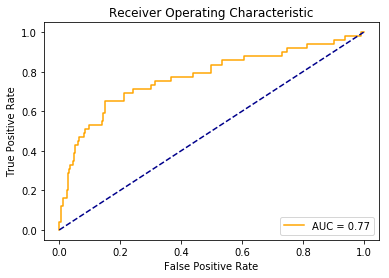

In [43]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Bernoulli Naive Bayes

In [44]:
bnb=BernoulliNB()

print("Start training...")
tStart = time()
bnb.fit(x_train, y_train)
print("Training time: ", round(time()-tStart, 3), "s")

# making predictions on the testing set 
y_pred = bnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.005 s
Accuracy:  84.01360544217688


The accuracy of the model created is 84.013%. This means, we can predict 84.013% of information of target variable ('Attrition') accuraly from this model.

In [45]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[232  13]
 [ 34  15]]


From this confussion matrix, 232 are truely classified as positive, 13 are falsely classified as positive, 34 are falsely classified as negative and 15 are truely classified as negative.
Out of 294 rows, 247 are correctly classified and 47 are wrongly classified

In [46]:
#Return probability estimates for the test vector 

probs = bnb.predict_proba(x_test)
#print(probs)

In [47]:
#Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7734693877551021


Here, Area under the curve is 77.34%. So, from this we can understand that 77% of data correctly predicted.

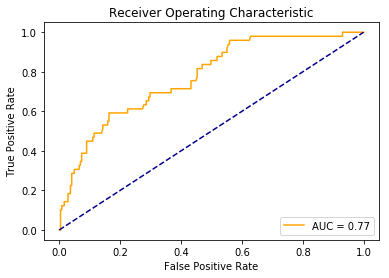

In [48]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Multinormial Naive Bayes

In [49]:
mnb=MultinomialNB()

print("Start training...")
tStart = time()
mnb.fit(x_train, y_train)
print("Training time: ", round(time()-tStart, 3), "s")

# making predictions on the testing set 
y_pred = mnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.004 s
Accuracy:  83.33333333333334


The accuracy of the model created is 83.33%. This means, we can predict 83.33% of information of target variable ('Attrition') accuraly from this model.

In [50]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[245   0]
 [ 49   0]]


From this confussion matrix, 245 are truely classified as positive 49 are falsely classified as negative.
Out of 294 rows, 245 are correctly classified and 49 are wrongly classified

In [51]:
#Return probability estimates for the test vector 

probs = mnb.predict_proba(x_test)
#print(probs)

In [52]:
#Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.8132444814660558


Here, Area under the curve is 81.32%. So, from this we can understand that 81% of data correctly predicted.

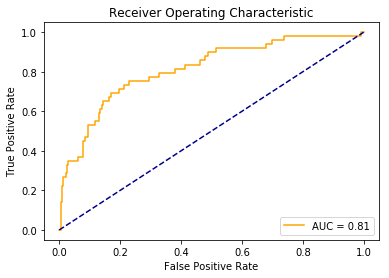

In [53]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ideal model for given data set is Multinomial Naive Bayes Algorithm model with accurary of 83.33% and area under the curve is 0.81.
From this we can predict 83.33% of information of target variable and 81.32% of data can be predicted correctly.

--------------------

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

## Without scaling

### Separtating the data into target variable and predictor's variable

In [55]:
X = data.loc[:,['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField',
                 'EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement',
                 'JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate',
                 'NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating',
                 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears', 
                 'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
                 'YearsSinceLastPromotion','YearsWithCurrManager']]
Y = data.loc[:,'Attrition']

### Spliting the Data into trainning and testing dataset

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1176, 34)

### Build Logistic regression model and Predicting the value to x_test

In [57]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = lr.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


### Accurary

In [59]:
print("Logistic regression score = ", lr.score(x_test, y_test)) 

Logistic regression score =  0.8639455782312925


The accuracy of the model created is 87.07%. This means, we can predict 87.07% of information of target variable ('Attrition') accuraly from this model.

### Confussion matrix

In [60]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[241   4]
 [ 36  13]]


From this confussion matrix, 239 are truely classified as positive, 6 are falsely classified as positive, 32 are falsely classified as negative and 17 are truely classified as negative.
Out of 294 rows, 256 are correctly classified and 38 are wrongly classified

### Area under the curve

In [61]:
probs = lr.predict_proba(x_test)
#print(probs)

In [62]:
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.8360683048729696


Here, Area under the curve is 84.78%. So, from this we can understand that 85% of data correctly predicted.

### ROC curve

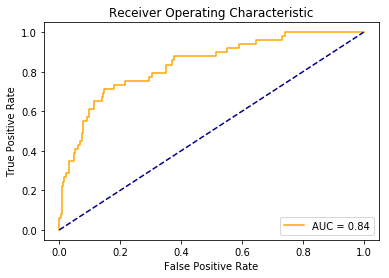

In [63]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## With scaling

### Separtating the data into target variable and predictor's variable

In [64]:
X = data_scaled.loc[:,['Age1','BusinessTravel1','DailyRate1','Department1','DistanceFromHome1','Education1',
                       'EducationField1','EmployeeCount1','EmployeeNumber1','EnvironmentSatisfaction1','Gender1',
                       'HourlyRate1','JobInvolvement1','JobLevel1','JobRole1','JobSatisfaction1','MaritalStatus1',
                       'MonthlyIncome1','MonthlyRate1','NumCompaniesWorked1','Over181','OverTime1','PercentSalaryHike1',
                       'PerformanceRating1','RelationshipSatisfaction1','StandardHours1','StockOptionLevel1',
                       'TotalWorkingYears1', 'TrainingTimesLastYear1','WorkLifeBalance1','YearsAtCompany1',
                       'YearsInCurrentRole1','YearsSinceLastPromotion1','YearsWithCurrManager1']]
Y = data_scaled.loc[:,'Attrition1']

### Spliting the Data into trainning and testing dataset

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1176, 34)

### Build Logistic regression model and Predicting the value to x_test

In [66]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred = lr.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0.]


### Accurary

In [68]:
print("Logistic regression score = ", lr.score(x_test, y_test)) 

Logistic regression score =  0.8809523809523809


The accuracy of the model created is 88.09%. This means, we can predict 88.09% of information of target variable ('Attrition') accuraly from this model.

### Confussion matrix

In [69]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[242   3]
 [ 32  17]]


From this confussion matrix, 242 are truely classified as positive, 3 are falsely classified as positive, 32 are falsely classified as negative and 17 are truely classified as negative.
Out of 294 rows, 259 are correctly classified and 35 are wrongly classified

### Area under the curve

In [70]:
probs = lr.predict_proba(x_test)
#print(probs)

In [71]:
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.8513952519783423


Here, Area under the curve is 85.13%. So, from this we can understand that 85% of data correctly predicted.

### ROC curve

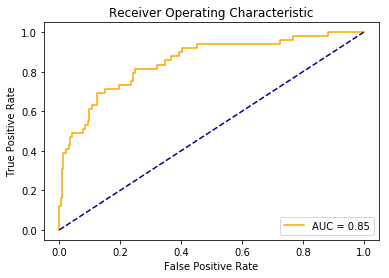

In [72]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

-----------

# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn import tree

## Information Gain

### Separtating the data into target variable and predictor's variable

In [74]:
Y = data['Attrition']
X = data.drop('Attrition',axis = 1)

In [75]:
X.shape, Y.shape, data.shape

((1470, 34), (1470,), (1470, 35))

### Spliting the Data into trainning and testing dataset

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
x_train.shape

(1029, 34)

### Build Decision Trees and Predicting the value to x_test

In [77]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]


### Confussion matrix

In [79]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[333,  38],
       [ 46,  24]], dtype=int64)

From this confussion matrix, 333 are truely classified as positive, 38 are falsely classified as positive, 46 are falsely classified as negative and 24 are truely classified as negative.
Out of 441 rows, 357 are correctly classified and 84 are wrongly classified

### Accurary

In [80]:
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

accuracy (in %) 80.95238095238095


The accuracy of the model created is 80.95%. This means, we can predict 80.95% of information of target variable ('Attrition') accuraly from this model.

### Drawing Decision Tree

In [81]:
cols = list(X.columns.values)

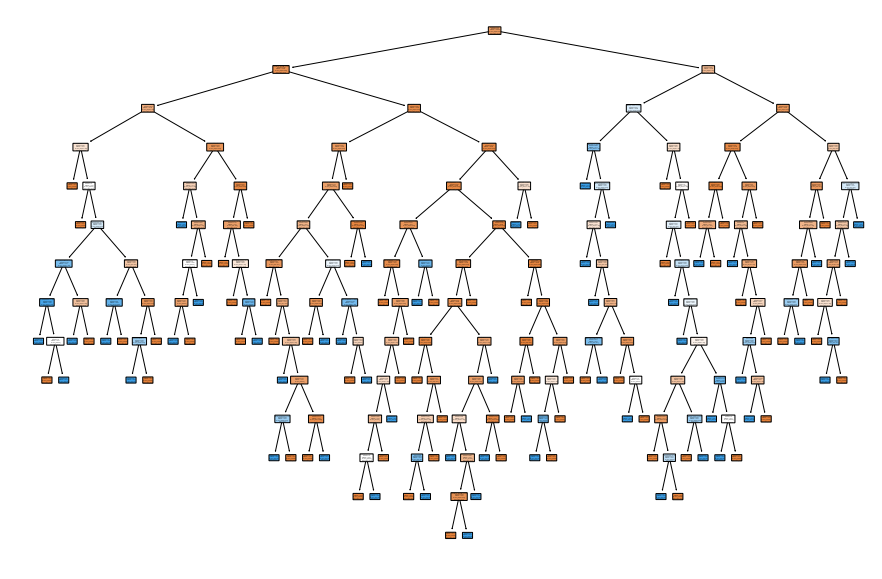

In [82]:
plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(x_train,y_train),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True,
               class_names=['Not_Leave','Leave'])
plt.show()

### Area under the curve

In [83]:
probs = clf.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.5920485175202157


Here, Area under the curve is 0.592. So, from this we can understand that 59% of data correctly predicted.

### ROC curve

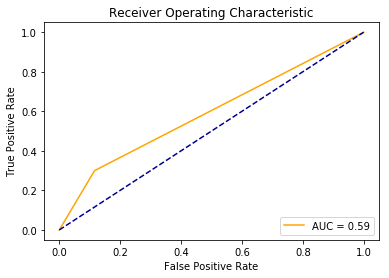

In [84]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## With Pruning

### Build Decision Trees and Predicting the value to x_test

In [85]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_leaf_nodes=10, min_samples_leaf=5,
                            max_depth=5)
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [86]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Confussion matrix

In [87]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[371,   0],
       [ 64,   6]], dtype=int64)

From this confussion matrix, 371 are truely classified as positive, 64 are falsely classified as negative and 6 are truely classified as negative.
Out of 441 rows, 377 are correctly classified and 64 are wrongly classified

### Accurary

In [88]:
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

accuracy (in %) 85.4875283446712


The accuracy of the model created is 85.48%. This means, we can predict 85.48% of information of target variable ('Attrition') accuraly from this model.

### Drawing Decision Tree

In [89]:
cols = list(X.columns.values)

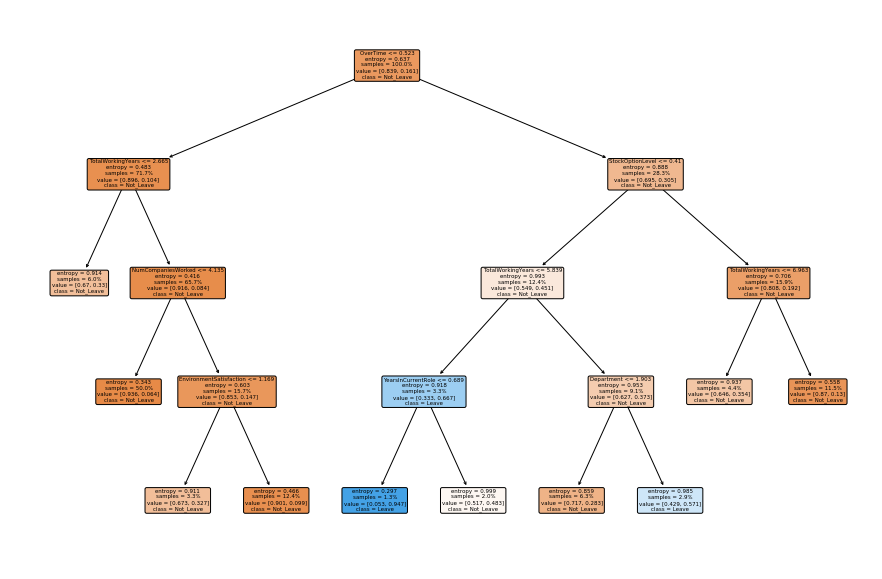

In [90]:
plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(X,Y),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True,
               class_names=['Not_Leave','Leave'])
plt.show()

### Area under the curve

In [91]:
probs = clf.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7737004235656528


Here, Area under the curve is 77.37%. So, from this we can understand that 77% of data correctly predicted.

### ROC curve

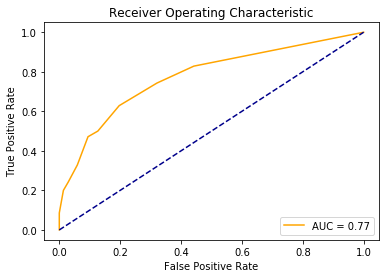

In [92]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gini Impurity

In [97]:
X = data.drop('Attrition',axis = 1)
Y = data['Attrition']

### Spliting the Data into trainning and testing dataset

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
x_train.shape

(1029, 34)

### Build Decision Trees and Predicting the value to x_test

In [99]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0]


### Confussion matrix

In [101]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[313,  58],
       [ 45,  25]], dtype=int64)

From this confussion matrix, 313 are truely classified as positive, 58 are falsely classified as positive, 45 are falsely classified as negative and 25 are truely classified as negative. Out of 441 rows, 338 are correctly classified and 103 are wrongly classified

### Accurary

In [102]:
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

accuracy (in %) 76.64399092970523


The accuracy of the model created is 76.64%. This means, we can predict 76.64% of information of target variable ('Attrition') accuraly from this model.

### Drawing Decision Tree

In [103]:
cols = list(X.columns.values)

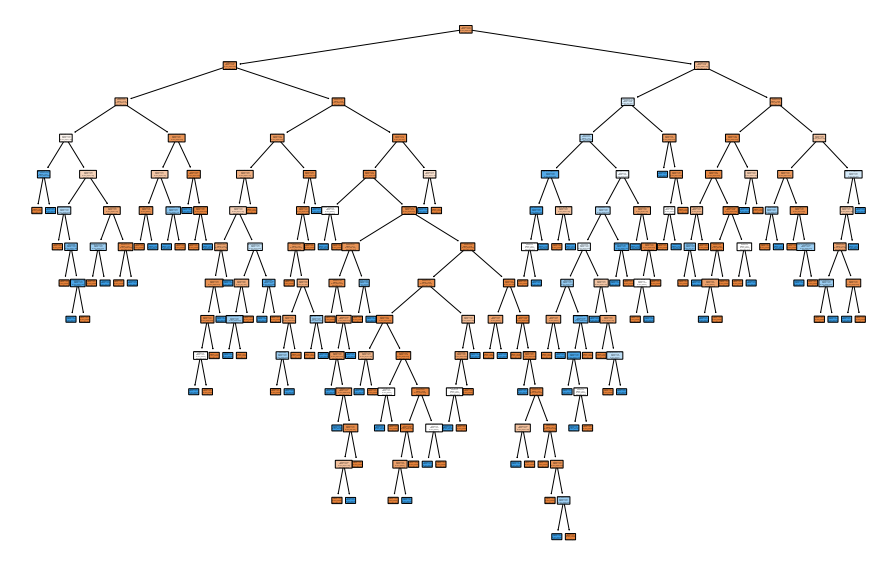

In [104]:
plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(x_train,y_train),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True,
               class_names=['Not_Leave','Leave'])
plt.show()

### Area under the curve

In [105]:
probs = clf.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.5911051212938006


Here, Area under the curve is 0.591. So, from this we can understand that 59% of data correctly predicted.

### ROC curve

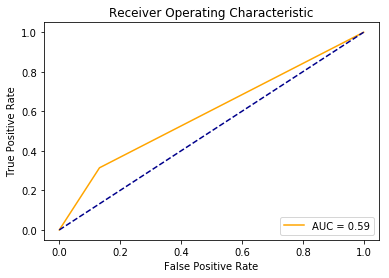

In [106]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## With Pruning

### Build Decision Trees and Predicting the value to x_test

In [107]:
clf = DecisionTreeClassifier(splitter='random', max_leaf_nodes=10, min_samples_leaf=5,max_depth=5)
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [109]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


### Confussion matrix

In [110]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[353,  18],
       [ 44,  26]], dtype=int64)

From this confussion matrix, 353 are truely classified as positive, 18 are falsely classified as positive, 44 are falsely classified negative and 26 are truely classified as negative. Out of 441 rows, 379 are correctly classified and 62 are wrongly classified.

### Accurary

In [111]:
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

accuracy (in %) 85.94104308390023


The accuracy of the model created is 85.94%. This means, we can predict 85.94% of information of target variable ('Attrition') accuraly from this model.

### Drawing Decision Tree

In [112]:
cols = list(X.columns.values)

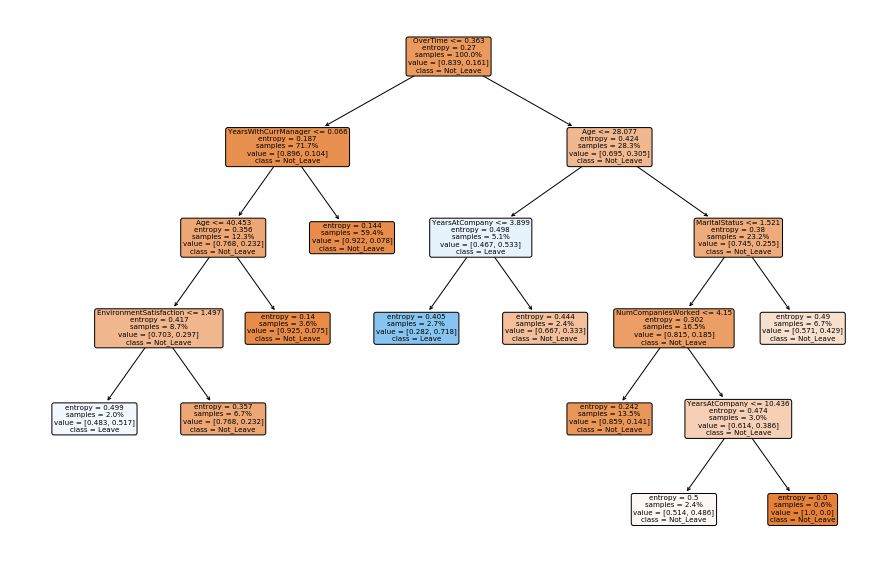

In [113]:
plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(X,Y),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True,
               class_names=['Not_Leave','Leave'])
plt.show()

### Area under the curve

In [114]:
probs = clf.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7323450134770891


Here, Area under the curve is 73.23%. So, from this we can understand that 73% of data correctly predicted.

### ROC curve

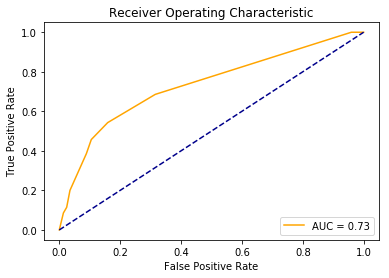

In [116]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

-------------------

# Random Forest

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [124]:
from xgboost import XGBClassifier

In [118]:
X = data.drop('Attrition',axis = 1)
Y = data['Attrition']

In [119]:
# Step 2: Split the training test set

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [134]:
# Step 3: Fit a Decision Tree model as comparison

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.7925170068027211

The accuracy of the model created is 79.25%. This means, we can predict 79.25% of information of target variable ('Attrition') accuraly from this model.

In [135]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[223,  32],
       [ 29,  10]], dtype=int64)

From this confussion matrix, 223 are truely classified as positive, 32 are falsely classified as positive, 29 are falsely classified negative and 10 are truely classified as negative. Out of 294 rows, 233 are correctly classified and 61 are wrongly classified.

In [137]:
probs = dt.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.5654600301659125


Here, Area under the curve is 56.54%. So, from this we can understand that 57% of data correctly predicted.

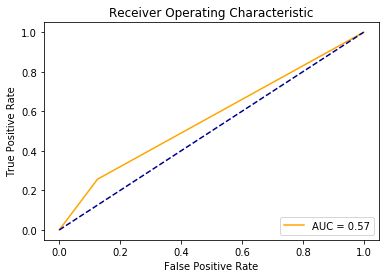

In [138]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [139]:
# Step 4: Fit a Random Forest model,
# compared to 'Decision Tree model, accuracy go up by 5%'

rf = RandomForestClassifier(n_estimators=100, random_state=0)

# n_estimators indicates the number of trees in the forest

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8775510204081632

The accuracy of the model created is 87.75%. This means, we can predict 87.75% of information of target variable ('Attrition') accuraly from this model.

In [140]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[254,   1],
       [ 35,   4]], dtype=int64)

From this confussion matrix, 254 are truely classified as positive, 1 are falsely classified as positive, 35 are falsely classified negative and 4 are truely classified as negative. Out of 294 rows, 258 are correctly classified and 36 are wrongly classified.

In [141]:
probs = rf.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7225238813474107


Here, Area under the curve is 72.25%. So, from this we can understand that 72% of data correctly predicted.

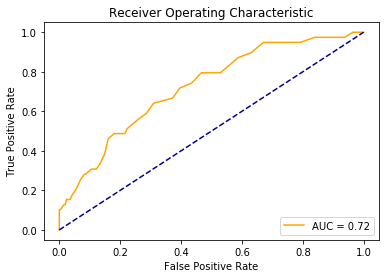

In [142]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [143]:
# Step 5: Fit a AdaBoost model,
# compared to 'Decision Tree model, accuracy goes up'

ab = AdaBoostClassifier(n_estimators=100)
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
accuracy_score(y_test, y_pred)

0.8673469387755102

The accuracy of the model created is 86.73%. This means, we can predict 86.73% of information of target variable ('Attrition') accuraly from this model.

In [144]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[241,  14],
       [ 25,  14]], dtype=int64)

From this confussion matrix, 241 are truely classified as positive, 14 are falsely classified as positive, 25 are falsely classified negative and 14 are truely classified as negative. Out of 294 rows, 255 are correctly classified and 39 are wrongly classified.

In [145]:
probs = ab.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7762694821518351


Here, Area under the curve is 77.62%. So, from this we can understand that 78% of data correctly predicted.

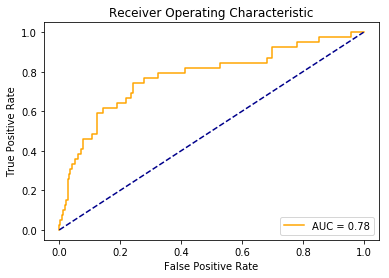

In [146]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [147]:
# Step 6: Fit a Gradient Boosting model,
# compared to 'Decision Tree model, accuracy goes up'

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
accuracy_score(y_test, y_pred)

0.8877551020408163

The accuracy of the model created is 88.77%. This means, we can predict 88.77% of information of target variable ('Attrition') accuraly from this model.

In [148]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[248,   7],
       [ 26,  13]], dtype=int64)

From this confussion matrix, 248 are truely classified as positive, 7 are falsely classified as positive, 26 are falsely classified negative and 13 are truely classified as negative. Out of 294 rows, 261 are correctly classified and 33 are wrongly classified.

In [149]:
probs = gb.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.783911513323278


Here, Area under the curve is 78.39%. So, from this we can understand that 78% of data correctly predicted.

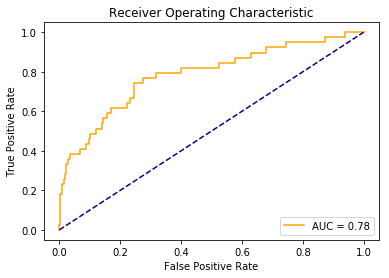

In [150]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [151]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.8877551020408163

The accuracy of the model created is 88.77%. This means, we can predict 88.77% of information of target variable ('Attrition') accuraly from this model.

In [152]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[250,   5],
       [ 28,  11]], dtype=int64)

From this confussion matrix, 250 are truely classified as positive, 5 are falsely classified as positive, 28 are falsely classified negative and 11 are truely classified as negative. Out of 294 rows, 261 are correctly classified and 33 are wrongly classified.

In [153]:
probs = xgb.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7827048768225239


Here, Area under the curve is 78.27%. So, from this we can understand that 78% of data correctly predicted.

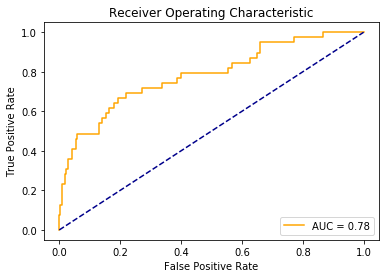

In [154]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

 --------------------

---------------------------------------------------------------------------------------------- END -----------------------------------------------------------------------------------------------------------